# Matching tool 

geinspireerd door : https://towardsdatascience.com/dating-algorithms-using-machine-learning-and-ai-814b68ecd75e 
data set verkregen door : https://generatedata.com/generator

## Importeren 

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [265]:
# pip install seaborn
# pip install sklearn
# pip install tensorflo


In [266]:
df0 = pd.read_json("data-for_model.json") # 500 
df1 = pd.read_json("data-for_model2.json") # 500 
df2 = pd.read_json("data-for_model3.json") # 500 

df = pd.concat([df0,df1,df2], ignore_index = True)
df # 1500 


,k1,k2,k3,k4,k5,s1,s2,d4
0,57,28,1,33,54,81,1,32
1,73,73,1,74,94,49,0,36
2,84,49,0,64,3,83,0,24
3,38,11,1,14,94,90,0,36
4,74,39,1,43,67,18,0,32
...,...,...,...,...,...,...,...,...
1495,92,93,1,24,36,73,1,36
1496,1,34,1,78,12,35,0,24
1497,43,81,0,74,66,25,1,24
1498,20,40,0,18,88,99,0,32


## Voorbewerken van de data 

In [267]:
from sklearn.preprocessing import StandardScaler

# scaling the data
scaler = StandardScaler().fit(df)
array_scaled = scaler.transform(df)


In [268]:
df_scaled = pd.DataFrame(array_scaled, columns=[
                         'k1', 'k2', 'k3', 'k4', 'k5', 's1', 's2', 'd4'])
df_scaled


,k1,k2,k3,k4,k5,s1,s2,d4
0,0.208890,-0.713576,0.960769,-0.560722,0.147341,1.028597,1.009377,-0.234507
1,0.756500,0.828438,0.960769,0.868269,1.540860,-0.056016,-0.990710,0.564950
2,1.132982,0.006031,-1.040833,0.519735,-1.629395,1.096385,-0.990710,-1.833422
3,-0.441396,-1.296114,0.960769,-1.222938,1.540860,1.333644,-0.990710,0.564950
4,0.790726,-0.336639,0.960769,-0.212188,0.600235,-1.106734,-0.990710,-0.234507
...,...,...,...,...,...,...,...,...
1495,1.406787,1.513778,0.960769,-0.874403,-0.479742,0.757444,1.009377,0.564950
1496,-1.707744,-0.507974,0.960769,1.007683,-1.315853,-0.530534,-0.990710,-1.833422
1497,-0.270268,1.102574,-1.040833,0.868269,0.565397,-0.869475,1.009377,-1.833422
1498,-1.057457,-0.302372,-1.040833,-1.083524,1.331832,1.638691,-0.990710,-0.234507


In [269]:
# bewijs dat het genormaliseerd :
df_scaled.mean()

# afgerond is dit 0 --> goed genormaliseerd


k1   -5.388282e-17
k2    6.335673e-17
k3   -1.894781e-17
k4   -2.842171e-17
k5    1.042129e-16
s1   -6.868580e-17
s2   -1.527667e-16
d4    2.723747e-16
dtype: float64

## Cluster methode bepalen

In [270]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# kiezen van het aantal clusters

cluster_cnt = [i for i in range(2, 40, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scoresA = []
db_scoresA = []

s_scoresB = []
db_scoresB = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:

    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)

    hac.fit(df_scaled)

    cluster_assignmentsA = hac.labels_

    # KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)

    k_means.fit(df_scaled)

    cluster_assignmentsB = k_means.predict(df_scaled)

    # Appending the scores to the empty lists
    s_scoresA.append(silhouette_score(df_scaled, cluster_assignmentsA))
    db_scoresA.append(davies_bouldin_score(df_scaled, cluster_assignmentsA))

    s_scoresB.append(silhouette_score(df_scaled, cluster_assignmentsB))
    db_scoresB.append(davies_bouldin_score(df_scaled, cluster_assignmentsB))


In [271]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """

    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[
                      i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y

    print('Max Value:\nCluster #',
          df[df['Cluster Score'] == df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #',
          df[df['Cluster Score'] == df['Cluster Score'].min()])

    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16, 6))
    plt.style.use('ggplot')
    plt.plot(x, y)
    plt.xlabel('Het aantal clusters')
    plt.ylabel('Score')
    plt.show()


Grafiek 1  - "The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. "

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20silhouette%20score%20of%201,value%20of%20the%20K%20(no.


Grafiek 2 - "Davies-Bouldin index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster's separation and a lower value will mean that the clustering is better " 

https://stackoverflow.com/questions/59279056/davies-bouldin-index-higher-or-lower-score-better#:~:text=Davies%2DBouldin%20index%20is%20a,that%20the%20clustering%20is%20better.


Max Value:
Cluster #    Cluster Score
5       0.128243

Min Value:
Cluster #     Cluster Score
21       0.089886


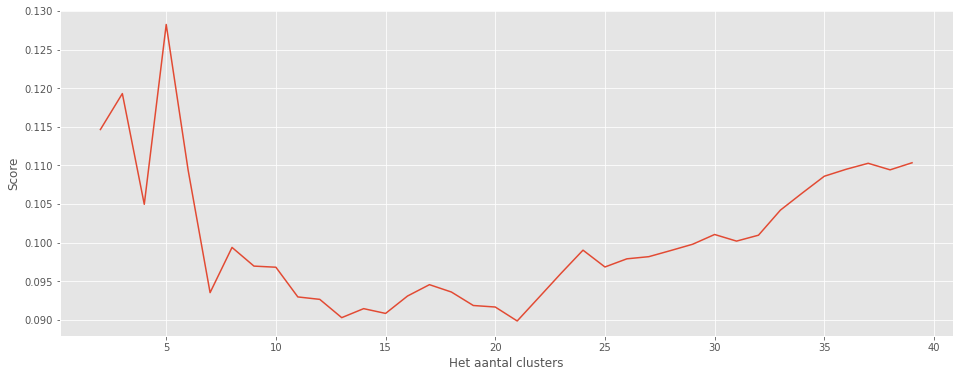

Max Value:
Cluster #    Cluster Score
2       2.766309

Min Value:
Cluster #     Cluster Score
39       1.709474


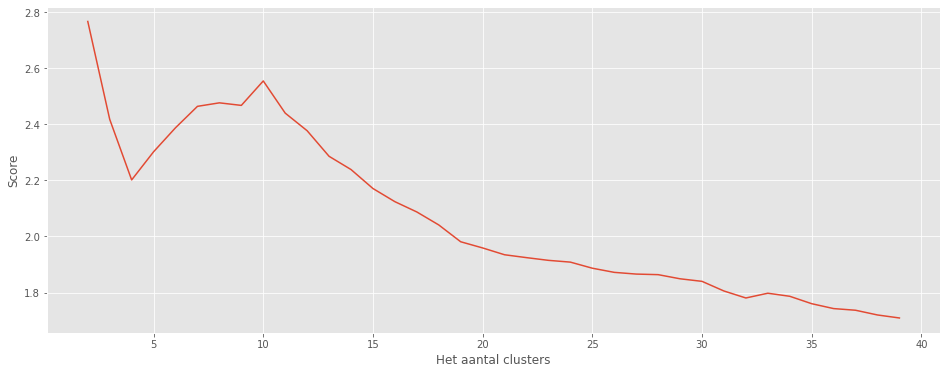

In [272]:
# Running the function on the list of scores
plot_evaluation(s_scoresA)
plot_evaluation(db_scoresA)


Dus vanuit deze twee grafieken is 16 het optimale aantal clusters. En gebruiken kmeans 

### AgglomerativeClustering

grafiek 1 de max is bij 5 clusters met een waarde van 0.128243

grafiek 2 de min is bij 19 clusters met een waarde van 1.61575

Max Value:
Cluster #     Cluster Score
39       0.147866

Min Value:
Cluster #    Cluster Score
7       0.109806


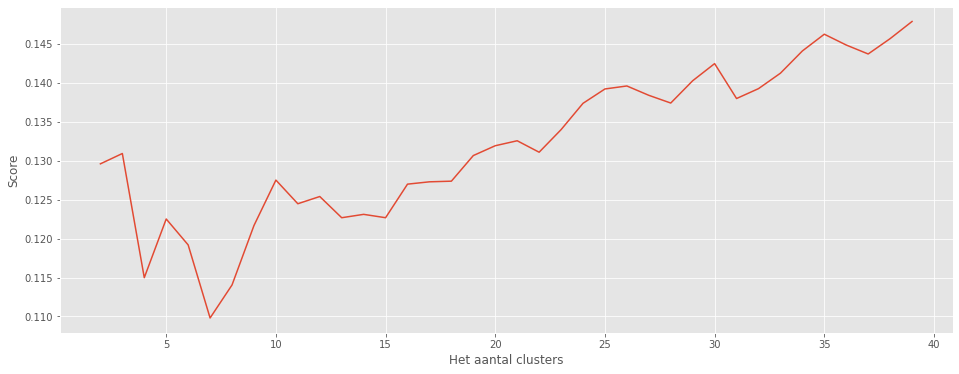

Max Value:
Cluster #    Cluster Score
2       2.598657

Min Value:
Cluster #     Cluster Score
39       1.536549


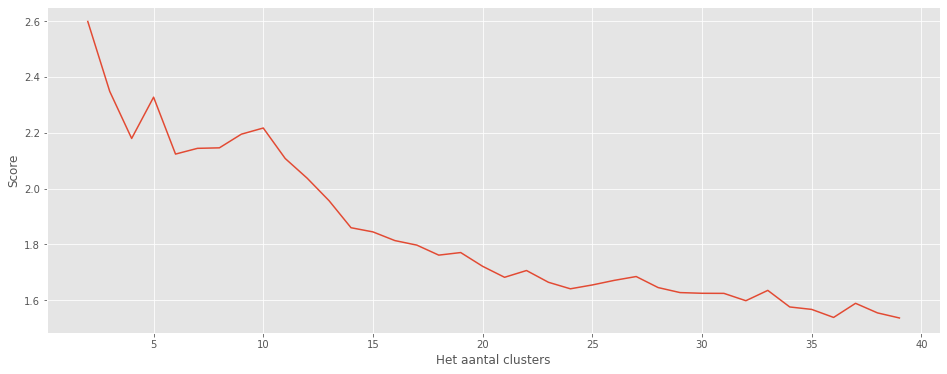

In [273]:
plot_evaluation(s_scoresB)
plot_evaluation(db_scoresB)


### Kmeans 
grafiek 1 de max is bij 17 clusters met een waarde van 0.140338

grafiek 2 de min is bij 19 clusters met een waarde van 1.595732

### Conclusie 
De waarden zijn nagenoeg gelijk voor beide clustering methodes. Maar AgglomerativeClustering heeft een kleine voor sprong. En heeft bij beide evaluatie methodes de piek/dal bij 19 zitten. 

## Clusteren 

In [274]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=20)

# Fitting
hac.fit(df_scaled)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Assigning the clusters to each profile
df_scaled['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df_scaled


,k1,k2,k3,k4,k5,s1,s2,d4,Cluster #
0,0.208890,-0.713576,0.960769,-0.560722,0.147341,1.028597,1.009377,-0.234507,0
1,0.756500,0.828438,0.960769,0.868269,1.540860,-0.056016,-0.990710,0.564950,8
2,1.132982,0.006031,-1.040833,0.519735,-1.629395,1.096385,-0.990710,-1.833422,3
3,-0.441396,-1.296114,0.960769,-1.222938,1.540860,1.333644,-0.990710,0.564950,16
4,0.790726,-0.336639,0.960769,-0.212188,0.600235,-1.106734,-0.990710,-0.234507,8
...,...,...,...,...,...,...,...,...,...
1495,1.406787,1.513778,0.960769,-0.874403,-0.479742,0.757444,1.009377,0.564950,0
1496,-1.707744,-0.507974,0.960769,1.007683,-1.315853,-0.530534,-0.990710,-1.833422,3
1497,-0.270268,1.102574,-1.040833,0.868269,0.565397,-0.869475,1.009377,-1.833422,1
1498,-1.057457,-0.302372,-1.040833,-1.083524,1.331832,1.638691,-0.990710,-0.234507,13


C:\Users\Merel\AppData\Local\Temp/ipykernel_108/3016453159.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter)


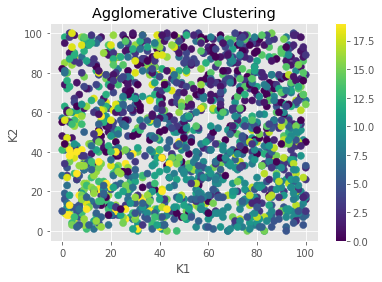

In [275]:
df["Clusters"] = df_scaled['Cluster #']
data = df
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['k1'], [data['k2']], c=data["Clusters"], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("K1")
ax.set_ylabel("K2")
plt.colorbar(scatter)
plt.show()


In [276]:
df_grouped = df.groupby(by=["Clusters"]).mean()
df_grouped

,k1,k2,k3,k4,k5,s1,s2,d4
Clusters,,,,,,,,
0,53.600000,59.600000,1.000000,32.688889,68.488889,53.488889,1.000,35.140741
1,43.895833,74.531250,0.000000,29.479167,51.000000,51.083333,1.000,32.583333
2,74.750000,66.716667,0.600000,77.316667,73.550000,37.966667,1.000,35.666667
3,52.744000,48.840000,0.536000,53.168000,48.104000,54.136000,0.008,24.256000
4,54.404494,76.977528,1.000000,44.797753,27.955056,48.471910,0.000,34.471910
5,51.792683,22.573171,1.000000,52.024390,29.158537,57.268293,0.000,35.658537
6,46.948052,28.818182,0.000000,46.142857,64.337662,72.883117,1.000,35.324675
7,30.242424,48.924242,0.000000,55.909091,26.757576,24.348485,0.000,35.090909
8,67.337500,50.487500,1.000000,60.025000,73.350000,42.062500,0.000,34.400000


hierboven staan alle gemiddelde van de verschillende clusters. Op deze clusters gaat er dus een model gemaakt worden. 

## TF -Model 

In [277]:
np.set_printoptions(precision=3, suppress=True)


In [278]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [279]:
print(tf.__version__)


2.9.1


In [280]:
dataset = df.copy()
dataset.isna().sum()

k1          0
k2          0
k3          0
k4          0
k5          0
s1          0
s2          0
d4          0
Clusters    0
dtype: int64

Geen NaN of gemiste data. --> data klaar voor training

In [281]:
# Data splitsen in training en test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


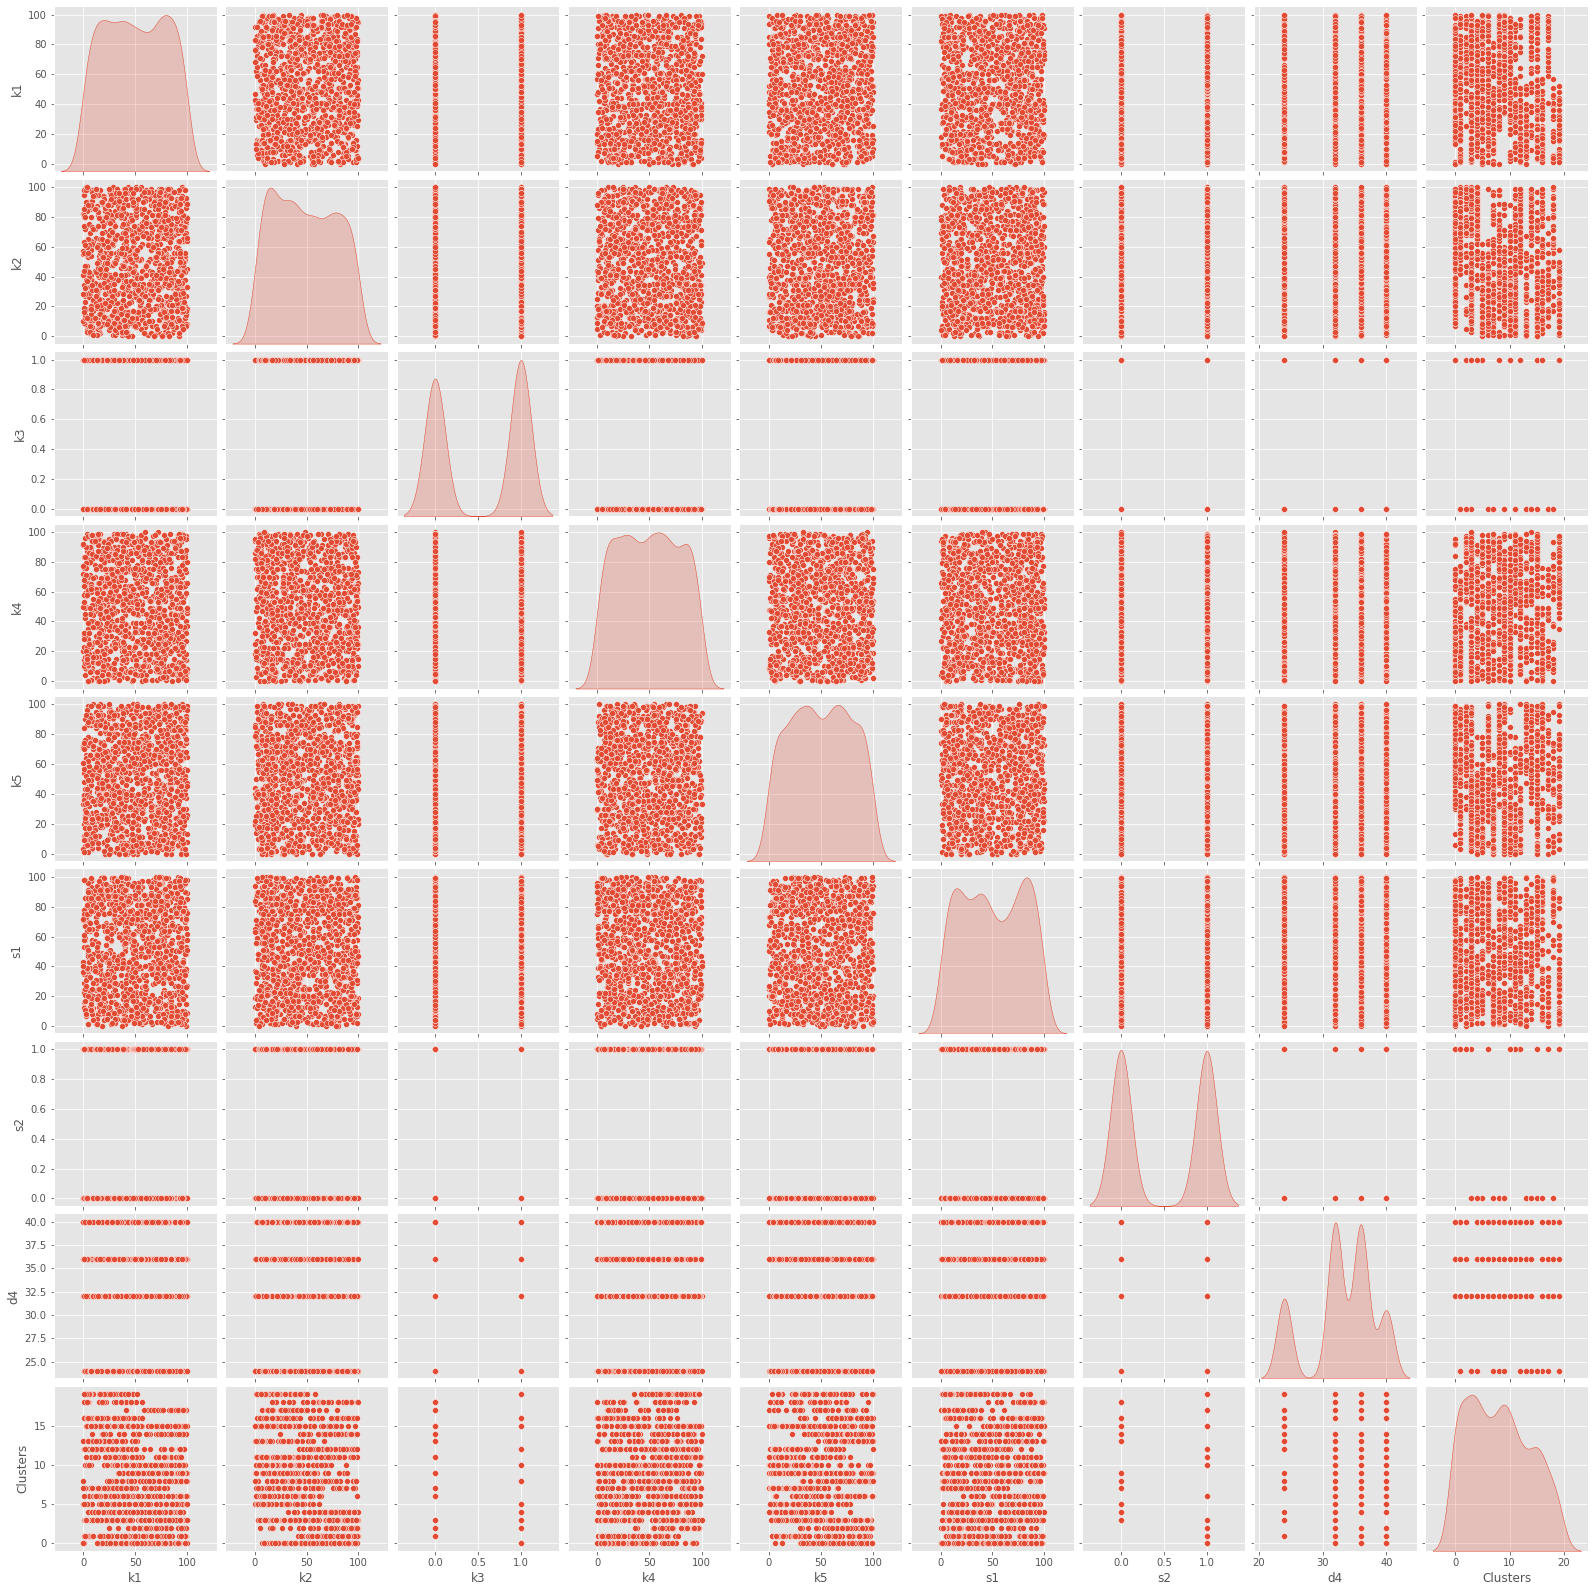

In [282]:
sns.pairplot(train_dataset, diag_kind='kde')


De grafiek hierboven laat zien dat er geen duidelijke functies zijn tussen het resultaat (het cluster nummer) en de andere colums. 

In [283]:
# Nu verdelen we de dataset in train en test
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Clusters')
test_labels = test_features.pop('Clusters')


Om de verschillende colommen te normaliseren gebruiken we de keras normalisatie laag 

In [284]:
from tensorflow.keras.layers import Normalization

normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


[[50.183 48.57   0.532 49.394 49.992 50.132  0.498 33.13 ]]


In [285]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())


First example: [[64 44  0 56 47 95  0 36]]

Normalized: [[ 0.47 -0.16 -1.07  0.23 -0.1   1.51 -1.    0.58]]


Hierboven zie je het verschil tussen genormaliseerd en rauwe data. Genormaliseerde data zorgt ervoor dat in het neurale netwerk de gewichten die aan elke berekening/handeling worden gehangen, sneller berekent kunnen worden. 

In [286]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluation(test, predict):

    a = plt.axes(aspect='equal')
    plt.scatter(test, predict)
    plt.xlabel('Echte waarden [Clusters]')
    plt.ylabel('Voorspelling  [Clusters]')
    lims = [0, 19]  # clusters lopen van 0 tot 19
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    
    x = r2_score(test, predict) # r2-score is altijd tussen 0 en 1 --> hoe hoger hoe beter
    y = mean_squared_error(test, predict) # mean squared error --> hoe dichter bij nul hoe beter
    print(" r2 score (tussen 0 en 1, hoger is beter)", x )
    print(" mean-squared (dichter bij nul beter) ", y)

In [287]:
def build_and_compile_model1(norm):
    model = keras.Sequential([
        norm,
        #layers.Dense(8, activation='relu'),
        layers.Dropout(.2, input_shape=(2,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                   metrics = ["accuracy"],
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model


In [288]:
model1 = build_and_compile_model1(normalizer)
model1.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 8)                 0         
                                                                 
 dense_124 (Dense)           (None, 8)                 72        
                                                                 
 dense_125 (Dense)           (None, 1)                 9         
                                                                 
Total params: 98
Trainable params: 81
Non-trainable params: 17
_________________________________________________________________


In [289]:
history = model1.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


In [321]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
def plot_acc(history):
    plt.plot(history.history['accuracy'], label='accc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.ylim([0, 0.3])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)


In [291]:
history.history

{'loss': [7.9367218017578125,
  7.717241287231445,
  7.488833427429199,
  7.29895544052124,
  7.087925434112549,
  6.919482231140137,
  6.717941761016846,
  6.5384416580200195,
  6.420495986938477,
  6.250486373901367,
  6.040224075317383,
  5.972130298614502,
  5.790863990783691,
  5.746794700622559,
  5.490746021270752,
  5.484321117401123,
  5.281538009643555,
  5.209687232971191,
  5.096436500549316,
  5.000202655792236,
  4.933007717132568,
  4.832534313201904,
  4.704787731170654,
  4.715401649475098,
  4.671564102172852,
  4.749621391296387,
  4.583283424377441,
  4.590703010559082,
  4.484507083892822,
  4.545392036437988,
  4.444882869720459,
  4.437666416168213,
  4.347777843475342,
  4.3885674476623535,
  4.336702346801758,
  4.365062236785889,
  4.349006652832031,
  4.2352423667907715,
  4.184441566467285,
  4.311805248260498,
  4.156054496765137,
  4.2073540687561035,
  4.137911796569824,
  4.105064392089844,
  4.199296951293945,
  4.045729637145996,
  4.0653204917907715,


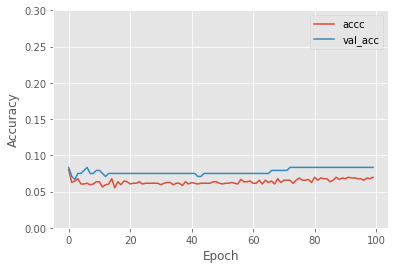

In [325]:
plot_acc(history)

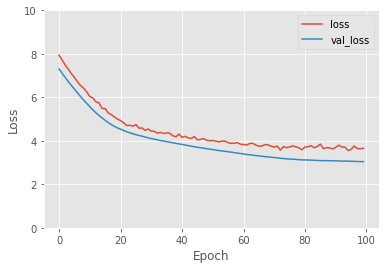

In [326]:

plot_loss(history)

In [293]:
model1.evaluate(test_features, test_labels, verbose=0)

[3.259605646133423, 0.09666666388511658]

x is de gemiddelde absolute afwijking dit berekent het gemiddelde verschil tussen de berekende en de echte waarden. Hoe kleiner deze is, hoe beter het model getraind is. 

10/10 [==============================] - 0s 2ms/step
 r2 score (tussen 0 en 1, hoger is beter) 0.3500293545329418
 mean-squared (dichter bij nul beter)  20.054707049860927


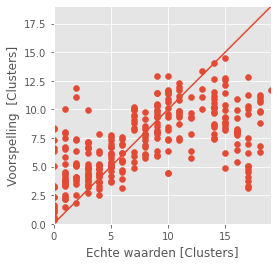

In [294]:
test_predictions = model1.predict(test_features).flatten()

evaluation(test_labels, test_predictions)

Hoe dichter de punten bij de rechte lijn liggen. Hoe beter het model voorspelt. 

interessante layers : 
* Embedding layer 
* Dropout layer
* Noise layer 


In [295]:
def build_and_compile_model2(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(16, activation='relu'),
        layers.Dropout(.3, input_shape=(8,)),
       # layers.Dense(8, activation='relu'),
       # layers.Dropout(.3, input_shape=(8,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  metrics = ["accuracy"],
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [296]:
model2 = build_and_compile_model2(normalizer)
model2.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_126 (Dense)           (None, 16)                144       
                                                                 
 dropout_58 (Dropout)        (None, 16)                0         
                                                                 
 dense_127 (Dense)           (None, 16)                272       
                                                                 
 dense_128 (Dense)           (None, 1)                 17        
                                                                 
Total params: 450
Trainable params: 433
Non-trainable params: 17
______________________________________________________

In [297]:
history2 = model2.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=200)

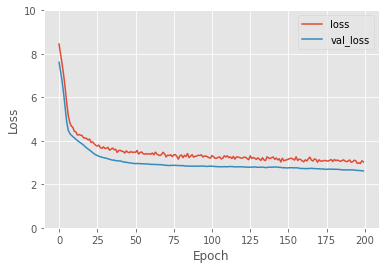

In [328]:
plot_loss(history2)

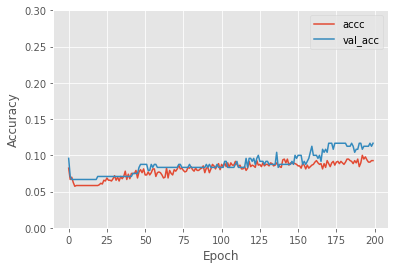

In [327]:
plot_acc(history2)

In [300]:
model2.evaluate(test_features, test_labels, verbose=0)


[2.906123638153076, 0.11666666716337204]

10/10 [==============================] - 0s 1ms/step
 r2 score (tussen 0 en 1, hoger is beter) 0.44849282531885937
 mean-squared (dichter bij nul beter)  17.016637445494162


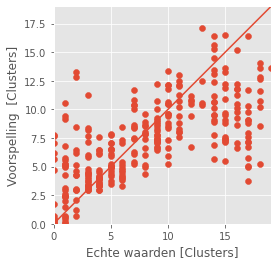

In [333]:
test_predictions2 = model2.predict(test_features).flatten()

evaluation(test_labels, test_predictions2)

In [302]:
STEPS_PER_EPOCH = 300/10

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=10000,
    decay_rate=1,
    staircase=False)


def build_and_compile_model3(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(16, activation='relu'),
        layers.Dropout(.3, input_shape=(8,)),
        # layers.Dense(8, activation='relu'),
        # layers.Dropout(.3, input_shape=(8,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                   metrics = ["accuracy"],
                  optimizer=tf.keras.optimizers.Adam(lr_schedule))
    return model


In [303]:
model3 = build_and_compile_model3(normalizer)
model3.summary()


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_129 (Dense)           (None, 16)                144       
                                                                 
 dropout_59 (Dropout)        (None, 16)                0         
                                                                 
 dense_130 (Dense)           (None, 16)                272       
                                                                 
 dense_131 (Dense)           (None, 1)                 17        
                                                                 
Total params: 450
Trainable params: 433
Non-trainable params: 17
______________________________________________________

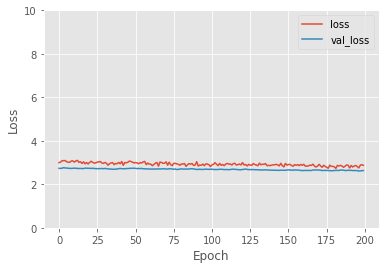

In [330]:
history3 = model3.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=200)

plot_loss(history3)


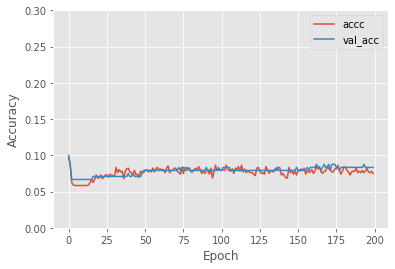

In [329]:
plot_acc(history3)

In [331]:
model3.evaluate(test_features, test_labels, verbose=0)

[2.7498159408569336, 0.10333333164453506]

10/10 [==============================] - 0s 1ms/step
 r2 score (tussen 0 en 1, hoger is beter) -0.1515626490757127
 mean-squared (dichter bij nul beter)  15.689060129659925


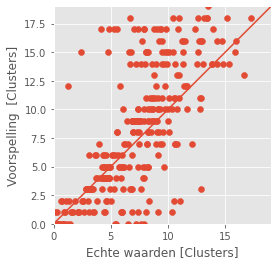

In [332]:
test_predictions3 = model3.predict(test_features)

evaluation(test_predictions3, test_labels)

if the chosen model fits worse than a horizontal line, then R2 is negative.